In [3]:
import numpy as np
%matplotlib inline

import matplotlib as mpl
mpl.style.use('classic')

import matplotlib.pyplot as plt
import scipy.optimize



In [23]:
import os

figure_stash = r"/Users/jesse/Thesis/Report/figures/results/delay-module"

def savefig(filename):
    plt.tight_layout()
    plt.savefig(os.path.join(figure_stash, filename + ".png"), dpi=300)
    plt.savefig(os.path.join(figure_stash, filename + ".pdf"))
    plt.savefig(os.path.join(figure_stash, filename + ".pgf"))

In [12]:
datafile = "../../Data/Delay module/delay_calibration_lt3.csv"

data = np.loadtxt(datafile, delimiter=";", skiprows=1)

dl = data[:,1]
V_c = data[:,0]

dl_l = np.linspace(np.min(dl), np.max(dl), 1001)
V_c_l = np.linspace(np.min(V_c), np.max(V_c), 1001)

In [13]:
def fitfunc(x, A, B, C):
    return A * 1 / (B - x) + C

popt, pcov = scipy.optimize.curve_fit(fitfunc, V_c, dl, p0=[1,3,0], maxfev=int(1e5))
print(popt)

[ 79.9037762    2.64324177 -50.03069213]


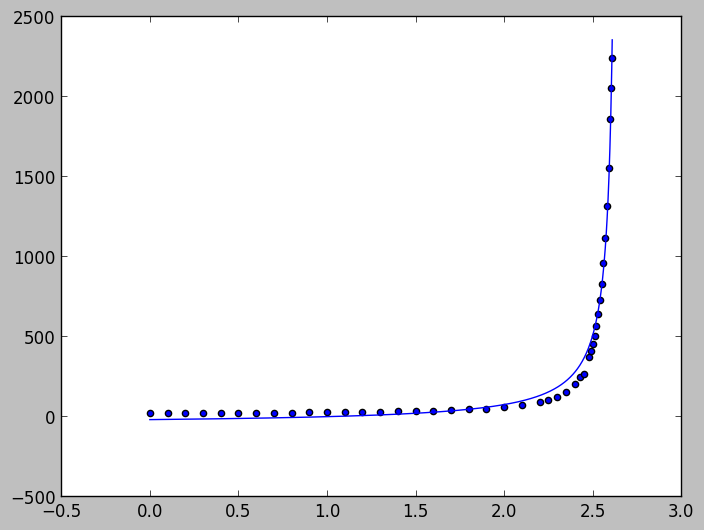

In [14]:
plt.scatter(V_c, dl)
plt.plot(V_c_l, fitfunc(V_c_l, *popt))

## Delay vs supply voltage

In [15]:
#def fitfunc_supply(x, A, B, C, D, E):
#    return A / (x-B) + C / (x-B)**2 + D / (x-B)**3 + E / (x-B)**4

# def fitfunc_supply(x, A, B, C):

#popt_s, pcov_s = scipy.optimize.curve_fit(fitfunc_supply, V_s, dl, p0=[400,1, 0,0, 0], maxfev=int(1e5))

#print(popt_s)

#plt.scatter(V_s, dl)
#plt.plot(V_s_l, fitfunc_supply(V_s_l, *popt_s), color='r')

[ 22.86956688 -28.13746927   2.83022322  79.67540221 -38.69814745
  10.18837816]


(0, 2000)

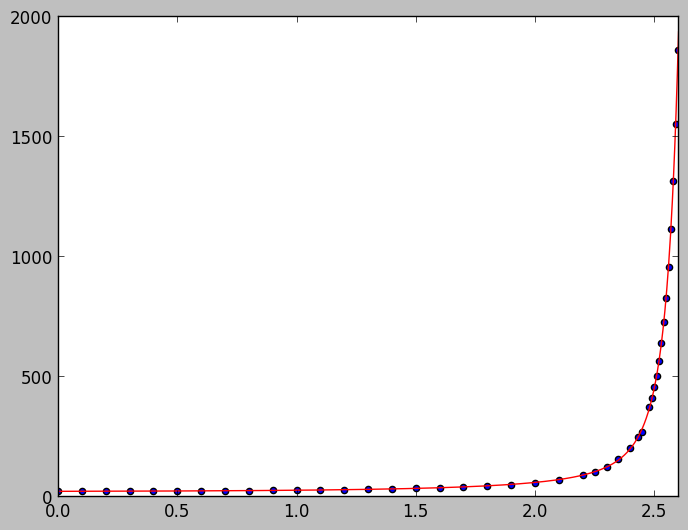

In [16]:
def fitfunc_control(x, dl0, A, B, C, D, E):
    return dl0 + A / (B-x) + C / (B-x)**2 + D / (B-x)**3 + E / (B-x)**4

# def fitfunc_supply(x, A, B, C):

popt_s, pcov_s = scipy.optimize.curve_fit(fitfunc_control, V_c, dl, p0=[20, 80, 5, 0, 0, 0], maxfev=int(1e5))

print(popt_s)

plt.scatter(V_c, dl)
plt.plot(V_c_l, fitfunc_control(V_c_l, *popt_s), color='r')
#plt.xlim(2.5,3)

plt.xlim(0, 2.6)
plt.ylim(0, 2000)

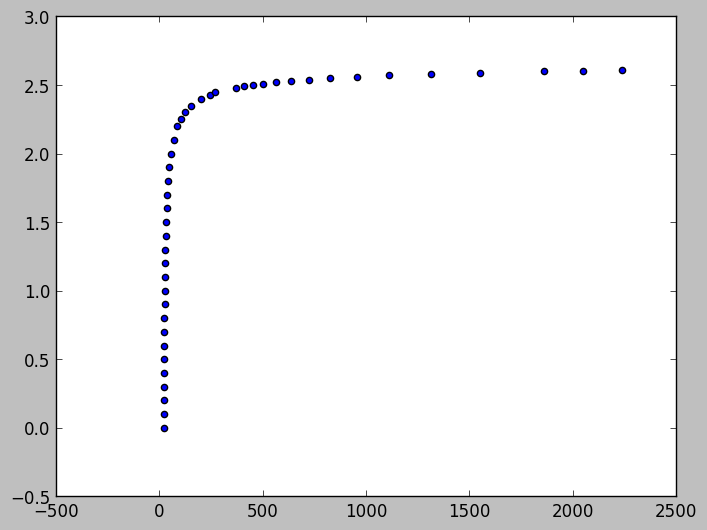

In [17]:
plt.scatter(dl, V_c)

[  3.46078240e+00   2.60090345e+00   3.98900617e+01   5.66692535e+02
   1.11796744e+04  -4.25871988e+00]


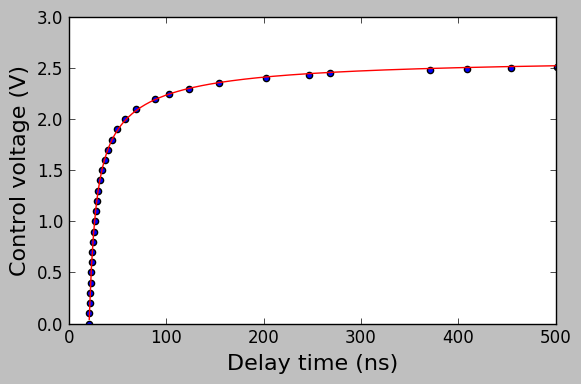

In [26]:
def V_c_from_dl_fit(dl, dl0, V_c0, A, B, C, D):
    return V_c0 + A / (dl0-dl) + B / (dl0-dl)**2 + C / (dl0-dl)**3 + D / (dl0-dl)**4

popt_s, pcov_s = scipy.optimize.curve_fit(V_c_from_dl_fit, dl, V_c, p0=[3, 20, -1, 0, 0, 0], maxfev=int(1e5))

print(popt_s)

plt.figure(figsize=(6,4))

plt.scatter(dl, V_c)
plt.plot(dl_l, V_c_from_dl_fit(dl_l, *popt_s), color='r')
plt.xlim(0,500)
plt.ylim(0,3)

plt.xlabel("Delay time (ns)", fontsize=16)
plt.ylabel("Control voltage (V)", fontsize=16)
savefig("control_voltage_delay_time")

In [19]:
np.savetxt("V_c_from_delay_fitparams.csv", popt_s)